# Ontario Child Care System

##Import Libraries & Modules

In [118]:
# Import module and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning & Data Wrangling

## Raw Data & Description

In [119]:
# Store dataset in variables
df_raw = pd.read_excel('/content/drive/MyDrive/Academic/Master of Information/Year 2/Winter/INF2178 - Experimental Design for Data Science/INF2178_A2_data.xlsx')
df_description = pd.read_excel('/content/drive/MyDrive/Academic/Master of Information/Year 2/Winter/INF2178 - Experimental Design for Data Science/INF2178_A2_data.xlsx',
                               sheet_name='DataDictionary')

# Set display options to show all rows and columns
pd.set_option('display.max_colwidth', None)

# Display the description of the the columns
df_description.dropna()

,Column,Description
0,_id,Unique row identifier for Open Data database
1,LOC_ID,Unique identifier
2,LOC_NAME,Name of the child care centre
3,AUSPICE,"Operating auspice (Commercial, Non Profit or Public)"
4,ADDRESS,"Address street number, street name, street type, street direction, and unit"
5,PCODE,Address postal code
6,ward,City ward number
7,bldg_type,Type of building
8,BLDGNAME,Name of the building the child care centre is located in
9,IGSPACE,Child care spaces for infants 0-18 months


In [120]:
# Reset all pandas options to their default values
pd.reset_option('all')

<ipython-input-120-49009b76c217>:2: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
<ipython-input-120-49009b76c217>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
<ipython-input-120-49009b76c217>:2: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


In [121]:
# Display raw dataset
df_raw

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1059,14492,The Neighbourhood Group Downsview Child Care,Non Profit Agency,2829 KEELE ST,M3M 2G7,6,Public Elementary School,Downsview Public School,0,0,0,52,60,112,Y,Y
1059,1060,14496,Lawrence Park School,Non Profit Agency,2180 BAYVIEW AVE,M4N 3K7,15,Other,NaN,0,25,35,0,0,60,N,N
1060,1061,14497,The Munchkin Manor Daycare & Early Learning Ce...,Non Profit Agency,525 BLOOR ST E,M4W 1J1,13,Other,Place Of Worship,0,25,24,0,0,49,N,N
1061,1062,14501,Columbus Early Learning Centres - Regina Mundi,Non Profit Agency,60 PLAYFAIR AVE,M6B 2P9,8,Catholic Elementary School,Regina Mundi Catholic School,0,0,0,26,30,56,Y,Y


In [122]:
# Display df details
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


In [123]:
# Define a list of columns to be dropped from the df
dropped_columns = ['_id',
                   'LOC_ID',
                   'LOC_NAME',
                   'ADDRESS',
                   'PCODE',
                   'BLDGNAME']

# Drop the specified columns from the raw df and assign the result to a new df
df = df_raw.drop(dropped_columns, axis=1)

In [124]:
# Show df statistcs
df.describe()

,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


array([[<Axes: title={'center': 'ward'}>,
        <Axes: title={'center': 'IGSPACE'}>,
        <Axes: title={'center': 'TGSPACE'}>],
       [<Axes: title={'center': 'PGSPACE'}>,
        <Axes: title={'center': 'KGSPACE'}>,
        <Axes: title={'center': 'SGSPACE'}>],
       [<Axes: title={'center': 'TOTSPACE'}>, <Axes: >, <Axes: >]],
      dtype=object)

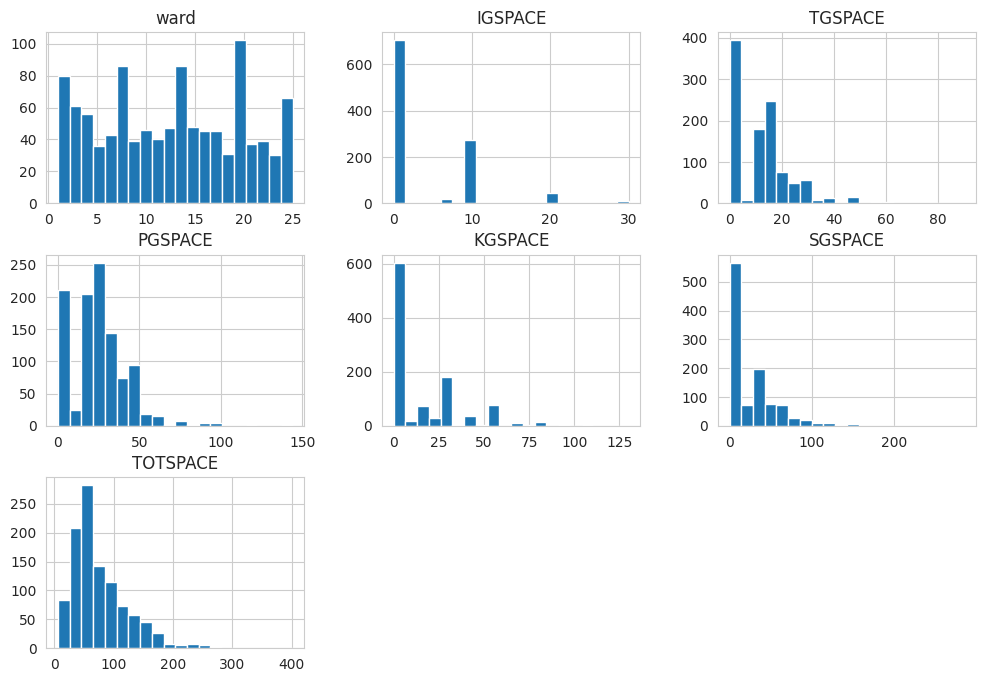

In [125]:
# Plot histograms for all numerical columns in the df
df.hist(figsize=(12,8), bins=20)

<Axes: >

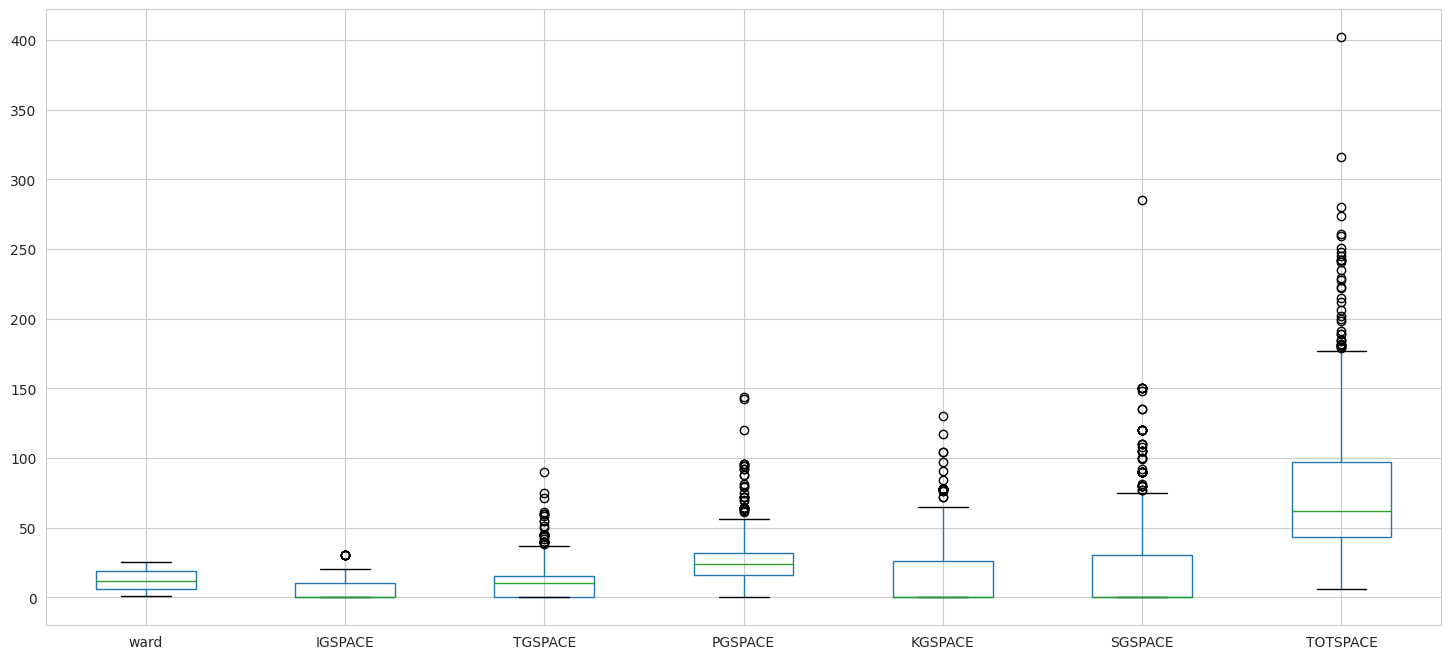

In [126]:
# Create a boxplot for all numerical columns in the df
df.boxplot(figsize=(18,8))

##Feature Engineering

In [127]:
# This function calculate the proportional frequency of Childe care space by age clusters
def computeProportionalFrequency(df, columns):
    # Iterate through rows in the DataFrame
    for column in columns:
      for row in df.index:
          # Check if cell is not null for the current row
          if pd.notnull(df.at[row, column]):
            column_space = df.at[row, column]
            total_space = df.at[row, 'TOTSPACE']
            # Calculate and store the proportional rate in the OCCUPANCY_RATE column
            df.at[row, column +'_PF'] = round((column_space/total_space) * 100, 4)

# Calculate occupancy rates
columns = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']

# Generate proportional frequencies
computeProportionalFrequency(df, columns)

In [128]:
# Show dataframe
df

,AUSPICE,ward,bldg_type,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,IGSPACE_PF,TGSPACE_PF,PGSPACE_PF,KGSPACE_PF,SGSPACE_PF
0,Non Profit Agency,3,Public Elementary School,0,20,32,52,60,164,Y,Y,0.0000,12.1951,19.5122,31.7073,36.5854
1,Non Profit Agency,8,Public Elementary School,0,0,12,26,45,83,Y,Y,0.0000,0.0000,14.4578,31.3253,54.2169
2,Non Profit Agency,25,Catholic Elementary School,0,10,16,26,50,102,Y,Y,0.0000,9.8039,15.6863,25.4902,49.0196
3,Non Profit Agency,10,Other,10,15,40,0,0,65,Y,Y,15.3846,23.0769,61.5385,0.0000,0.0000
4,Non Profit Agency,20,High Rise Apartment,0,10,16,0,0,26,Y,Y,0.0000,38.4615,61.5385,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,Non Profit Agency,6,Public Elementary School,0,0,0,52,60,112,Y,Y,0.0000,0.0000,0.0000,46.4286,53.5714
1059,Non Profit Agency,15,Other,0,25,35,0,0,60,N,N,0.0000,41.6667,58.3333,0.0000,0.0000
1060,Non Profit Agency,13,Other,0,25,24,0,0,49,N,N,0.0000,51.0204,48.9796,0.0000,0.0000
1061,Non Profit Agency,8,Catholic Elementary School,0,0,0,26,30,56,Y,Y,0.0000,0.0000,0.0000,46.4286,53.5714


In [129]:
# Apply Square Root Transformation to TOTSPACE and store it in new column: TOTSPACE_sqrt
df['TOTSPACE_sqrt'] = df['TOTSPACE'].apply(np.sqrt)

In [130]:
# Define ward numbers for different community councils
ETOBICOKE = [1, 2, 3, 5, 7]
NORTH_YORK = [6, 8, 15, 16, 17, 18]
TORONTO_EAST_YORK = [4, 9, 10, 11, 12, 13, 14, 19]
SCARBOROUGH = [20, 21, 22, 23, 24, 25]

# Function to assign community council labels based on ward numbers
def defineCommunityCouncil(df):
    for index, row in df.iterrows():
        ward_number = row['ward']
        if ward_number in ETOBICOKE:
            df.at[index, 'COMMUNITY_COUNCIL'] = 'ETOBICOKE'
        elif ward_number in NORTH_YORK:
            df.at[index, 'COMMUNITY_COUNCIL'] = 'NORTH_YORK'
        elif ward_number in TORONTO_EAST_YORK:
            df.at[index, 'COMMUNITY_COUNCIL'] = 'TORONTO_EAST_YORK'
        elif ward_number in SCARBOROUGH:
            df.at[index, 'COMMUNITY_COUNCIL'] = 'SCARBOROUGH'

# Create an empty 'COMMUNITY_COUNCIL' column in the DataFrame
df['COMMUNITY_COUNCIL'] = ''

# Call the function to assign COMMUNITY_COUNCIL labels
defineCommunityCouncil(df)

# Display the updated df
df

,AUSPICE,ward,bldg_type,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,IGSPACE_PF,TGSPACE_PF,PGSPACE_PF,KGSPACE_PF,SGSPACE_PF,TOTSPACE_sqrt,COMMUNITY_COUNCIL
0,Non Profit Agency,3,Public Elementary School,0,20,32,52,60,164,Y,Y,0.0000,12.1951,19.5122,31.7073,36.5854,12.806248,ETOBICOKE
1,Non Profit Agency,8,Public Elementary School,0,0,12,26,45,83,Y,Y,0.0000,0.0000,14.4578,31.3253,54.2169,9.110434,NORTH_YORK
2,Non Profit Agency,25,Catholic Elementary School,0,10,16,26,50,102,Y,Y,0.0000,9.8039,15.6863,25.4902,49.0196,10.099505,SCARBOROUGH
3,Non Profit Agency,10,Other,10,15,40,0,0,65,Y,Y,15.3846,23.0769,61.5385,0.0000,0.0000,8.062258,TORONTO_EAST_YORK
4,Non Profit Agency,20,High Rise Apartment,0,10,16,0,0,26,Y,Y,0.0000,38.4615,61.5385,0.0000,0.0000,5.099020,SCARBOROUGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,Non Profit Agency,6,Public Elementary School,0,0,0,52,60,112,Y,Y,0.0000,0.0000,0.0000,46.4286,53.5714,10.583005,NORTH_YORK
1059,Non Profit Agency,15,Other,0,25,35,0,0,60,N,N,0.0000,41.6667,58.3333,0.0000,0.0000,7.745967,NORTH_YORK
1060,Non Profit Agency,13,Other,0,25,24,0,0,49,N,N,0.0000,51.0204,48.9796,0.0000,0.0000,7.000000,TORONTO_EAST_YORK
1061,Non Profit Agency,8,Catholic Elementary School,0,0,0,26,30,56,Y,Y,0.0000,0.0000,0.0000,46.4286,53.5714,7.483315,NORTH_YORK


## Removing Outliers

In [131]:
# This function remove outliers in selected columns of a df
def remove_outliers(df, columns):
  for column in columns:
    # Calculate the interquartile range (IQR) for the current column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN values
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

  return df

# Exploratory Data Analysis

## Additional EDA

In [132]:
df['AUSPICE'].value_counts()

Non Profit Agency                703
Commercial Agency                321
Public (City Operated) Agency     39
Name: AUSPICE, dtype: int64

In [133]:
df['subsidy'].value_counts()

Y    718
N    345
Name: subsidy, dtype: int64

In [134]:
df['cwelcc_flag'].value_counts()

Y    926
N    137
Name: cwelcc_flag, dtype: int64

In [135]:
df.drop(columns, axis=1).corr()

<ipython-input-135-b3349d38c9f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(columns, axis=1).corr()


,ward,TOTSPACE,IGSPACE_PF,TGSPACE_PF,PGSPACE_PF,KGSPACE_PF,SGSPACE_PF,TOTSPACE_sqrt
ward,1.000000,-0.053577,0.003408,-0.012930,-0.035002,0.028875,0.023442,-0.045737
TOTSPACE,-0.053577,1.000000,-0.097523,-0.210408,-0.347744,0.364437,0.275043,0.980377
IGSPACE_PF,0.003408,-0.097523,1.000000,0.495428,0.065385,-0.383121,-0.444377,-0.066873
TGSPACE_PF,-0.012930,-0.210408,0.495428,1.000000,0.217117,-0.546919,-0.645579,-0.196281
PGSPACE_PF,-0.035002,-0.347744,0.065385,0.217117,1.000000,-0.647119,-0.744364,-0.372041
KGSPACE_PF,0.028875,0.364437,-0.383121,-0.546919,-0.647119,1.000000,0.460256,0.378517
SGSPACE_PF,0.023442,0.275043,-0.444377,-0.645579,-0.744364,0.460256,1.000000,0.271664
TOTSPACE_sqrt,-0.045737,0.980377,-0.066873,-0.196281,-0.372041,0.378517,0.271664,1.000000


In [136]:
df[['COMMUNITY_COUNCIL', 'subsidy', 'TOTSPACE_sqrt']].groupby(['COMMUNITY_COUNCIL', 'subsidy']).mean()

TOTSPACE_sqrt
COMMUNITY_COUNCIL subsidy               
ETOBICOKE         N             7.440803
                  Y             8.468436
NORTH_YORK        N             7.528480
                  Y             9.253554
SCARBOROUGH       N             6.551663
                  Y             8.056123
TORONTO_EAST_YORK N             7.208312
                  Y             9.312893

<Axes: ylabel='COMMUNITY_COUNCIL,subsidy'>

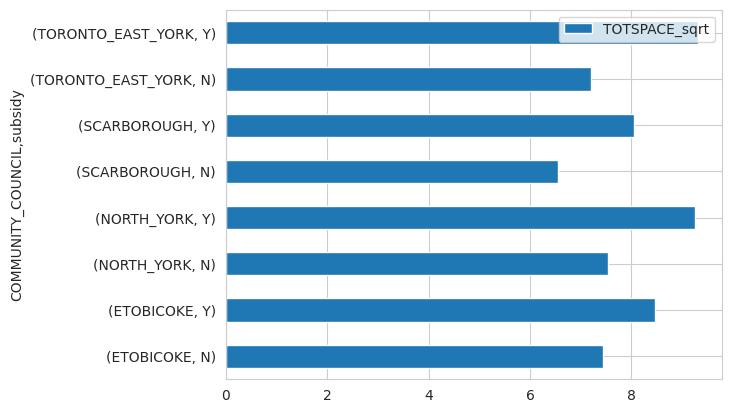

In [137]:
df[['COMMUNITY_COUNCIL', 'subsidy', 'TOTSPACE_sqrt']].groupby(['COMMUNITY_COUNCIL', 'subsidy']).mean().plot(kind='barh')

In [138]:
pivot_table = df.pivot_table(index='COMMUNITY_COUNCIL', columns='subsidy', values='TOTSPACE_sqrt', aggfunc='mean')
pivot_table

subsidy,N,Y
COMMUNITY_COUNCIL,,
ETOBICOKE,7.440803,8.468436
NORTH_YORK,7.528480,9.253554
SCARBOROUGH,6.551663,8.056123
TORONTO_EAST_YORK,7.208312,9.312893


In [139]:
df_filter = df.filter(['AUSPICE', 'TOTSPACE', 'IGSPACE_PF', 'TGSPACE_PF', 'PGSPACE_PF', 'KGSPACE_PF', 'SGSPACE_PF'])
df_filter

,AUSPICE,TOTSPACE,IGSPACE_PF,TGSPACE_PF,PGSPACE_PF,KGSPACE_PF,SGSPACE_PF
0,Non Profit Agency,164,0.0000,12.1951,19.5122,31.7073,36.5854
1,Non Profit Agency,83,0.0000,0.0000,14.4578,31.3253,54.2169
2,Non Profit Agency,102,0.0000,9.8039,15.6863,25.4902,49.0196
3,Non Profit Agency,65,15.3846,23.0769,61.5385,0.0000,0.0000
4,Non Profit Agency,26,0.0000,38.4615,61.5385,0.0000,0.0000
...,...,...,...,...,...,...,...
1058,Non Profit Agency,112,0.0000,0.0000,0.0000,46.4286,53.5714
1059,Non Profit Agency,60,0.0000,41.6667,58.3333,0.0000,0.0000
1060,Non Profit Agency,49,0.0000,51.0204,48.9796,0.0000,0.0000
1061,Non Profit Agency,56,0.0000,0.0000,0.0000,46.4286,53.5714


In [140]:
df_filter.mean()

<ipython-input-140-a2808e2044cc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filter.mean()


TOTSPACE      75.674506
IGSPACE_PF     5.709267
TGSPACE_PF    17.701318
PGSPACE_PF    38.390497
KGSPACE_PF    14.499665
SGSPACE_PF    23.699251
dtype: float64

<ipython-input-141-7963511ad1ab>:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop(drop_columns_2, axis=1).corr()


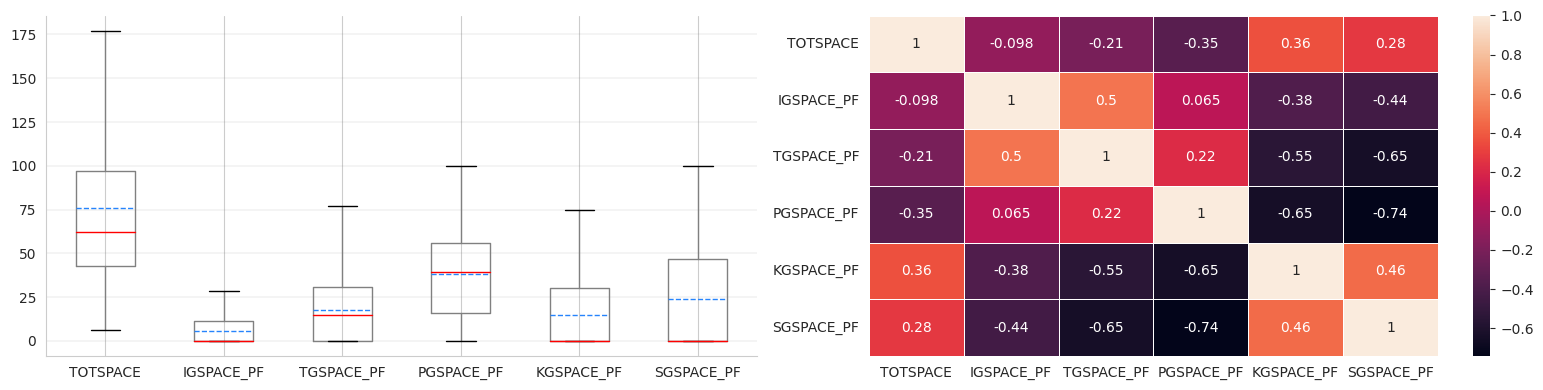

In [141]:
# Define the list of columns to drop
drop_columns_2 = ['ward', 'IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE_sqrt']

# Create subplots with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

# Remove top and right border from both subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove y-axis tick marks from both subplots
for ax in axs:
    ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis for the boxplot
axs[0].grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Define features for the boxplot by dropping specified columns
boxplot_compare = df.drop(drop_columns_2, axis=1)

# Plot the boxplot on the first subplot
boxplot_compare.boxplot(ax=axs[0],
                         meanline=True,
                         showmeans=True,
                         showfliers=False,
                         boxprops=dict(color='grey'),
                         whiskerprops=dict(color='grey'),
                         medianprops=dict(color='r'),
                         meanprops=dict(color='#2684fc'),
                         fontsize=10
                        )

# Create and store the correlation matrix
correlation_matrix = df.drop(drop_columns_2, axis=1).corr()

# Create a heatmap using seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, annot_kws={"size": 10}, ax=axs[1])

# Set title for the heatmap
#heatmap.set_title('Correlation Matrix Heatmap')

# Adjust x-axis tick label size for the heatmap
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10, rotation=0)

# Adjust y-axis tick label size for the heatmap
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10, rotation=0)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<Axes: >

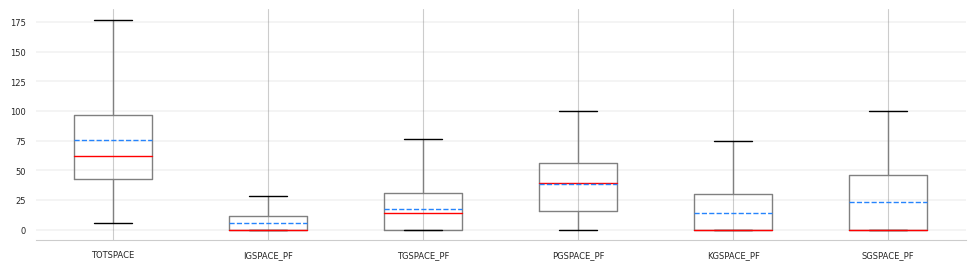

In [142]:
# Plot settings
fig, ax = plt.subplots(figsize=(12, 3))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Drop columns and assign to variable
boxplot_compare = df.drop(drop_columns_2, axis=1)

# Plot boxplots
boxplot_compare.boxplot(figsize=(16,8),
          meanline=True,
          showmeans=True,
          showfliers=False,
          boxprops=dict(color='grey'),
          whiskerprops=dict(color='grey'),
          medianprops=dict(color='r'),
          meanprops=dict(color='#2684fc'),
          fontsize=6
          )

## Child Care by Community Councils

In [143]:
# Retreave value counts in community council
community_council_counts = df['COMMUNITY_COUNCIL'].value_counts()

# Sort data in alphabetical order
community_council_counts.sort_values(inplace=True)

# Display data
community_council_counts

ETOBICOKE            210
SCARBOROUGH          214
NORTH_YORK           265
TORONTO_EAST_YORK    374
Name: COMMUNITY_COUNCIL, dtype: int64

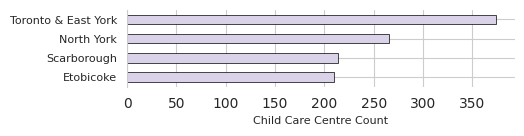

In [144]:
import matplotlib.pyplot as plt

# Plot settings
fig, ax = plt.subplots(figsize=(5, 1))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)  # Hide bottom border for horizontal bars

# Remove x-axis tick marks
ax.xaxis.set_ticks_position('none')

# Extracting and plotting monthly occupancy rates
community_council_counts.plot(kind='barh', color='#d9d2e9', edgecolor='black', linewidth=0.5, ax=ax)

# Set labels and title
#ax.set_ylabel('Community Council')
ax.set_xlabel('Child Care Centre Count', fontsize=8)  # Smaller font size
#ax.set_title('Number of Child Care Centers by Community Council')
ax.legend().set_visible(False)  # Hide legend

# Customize y-axis ticks
community_councils = ['Etobicoke', 'Scarborough', 'North York', 'Toronto & East York']
plt.yticks(range(0, 4), community_councils, fontsize=8)  # Smaller font size

# Show the plot
plt.show()


In [145]:
# Selecting the columns 'COMMUNITY_COUNCIL' and 'TOTSPACE_sqrt' from df and sorting the values by 'COMMUNITY_COUNCIL'
df_community_council = df.filter(['COMMUNITY_COUNCIL', 'TOTSPACE_sqrt']).sort_values(['COMMUNITY_COUNCIL'])

In [146]:
# Removing outliers from the 'TOTSPACE_sqrt' column in the df 'df_community_council'
df_community_council = remove_outliers(df_community_council, ['TOTSPACE_sqrt'])


In [147]:
# Create a new df with by community council
df_community_council_pivot = df_community_council.pivot_table(
    values='TOTSPACE_sqrt',
    index=df_community_council.index,
    columns='COMMUNITY_COUNCIL'
)

# Show the df
df_community_council_pivot

COMMUNITY_COUNCIL,ETOBICOKE,NORTH_YORK,SCARBOROUGH,TORONTO_EAST_YORK
0,12.806248,NaN,NaN,NaN
1,NaN,9.110434,NaN,NaN
2,NaN,NaN,10.099505,NaN
3,NaN,NaN,NaN,8.062258
4,NaN,NaN,5.099020,NaN
...,...,...,...,...
1058,NaN,10.583005,NaN,NaN
1059,NaN,7.745967,NaN,NaN
1060,NaN,NaN,NaN,7.000000
1061,NaN,7.483315,NaN,NaN


In [148]:
# Removing outliers from the columns 'ETOBICOKE', 'NORTH_YORK', 'SCARBOROUGH', and 'TORONTO_EAST_YORK'
df_community_council_pivot = remove_outliers(df_community_council_pivot, ['ETOBICOKE', 'NORTH_YORK', 'SCARBOROUGH', 'TORONTO_EAST_YORK'])

In [149]:
# Reshape the DataFrame
df_new = df_community_council_pivot.reset_index().melt(id_vars=['index'], var_name='COMMUNITY_COUNCIL', value_name='TOTSPACE_sqrt').dropna()

# Rename the columns
df_new.columns = ['DROP_COLUMN', 'COMMUNITY_COUNCIL', 'TOTSPACE_sqrt']

# Drop the 'DROP_COLUMN' column
df_new = df_new.drop(columns=['DROP_COLUMN'])

# Display the resulting DataFrame
df_new

,COMMUNITY_COUNCIL,TOTSPACE_sqrt
0,ETOBICOKE,12.806248
10,ETOBICOKE,13.747727
14,ETOBICOKE,9.000000
16,ETOBICOKE,8.000000
18,ETOBICOKE,9.110434
...,...,...
4154,TORONTO_EAST_YORK,7.874008
4168,TORONTO_EAST_YORK,6.244998
4174,TORONTO_EAST_YORK,7.000000
4177,TORONTO_EAST_YORK,7.000000


array([[<Axes: title={'center': 'ETOBICOKE'}>,
        <Axes: title={'center': 'NORTH_YORK'}>],
       [<Axes: title={'center': 'SCARBOROUGH'}>,
        <Axes: title={'center': 'TORONTO_EAST_YORK'}>]], dtype=object)

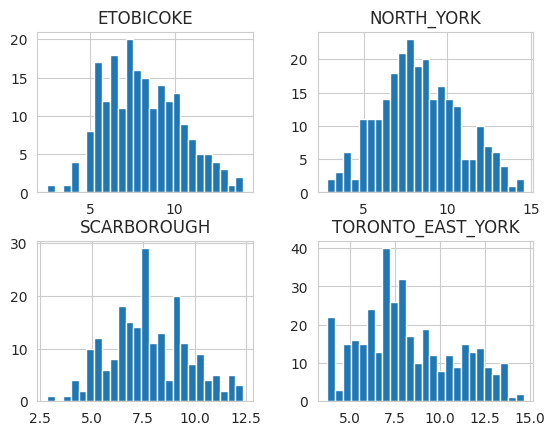

In [150]:
# Generate quic histogram plots
df_community_council_pivot.hist(bins=25)

In [151]:
# Storing data for each community council in separate variables
etobicoke_data = df_new.loc[df_new['COMMUNITY_COUNCIL'] == 'ETOBICOKE', 'TOTSPACE_sqrt']
north_york_data = df_new.loc[df_new['COMMUNITY_COUNCIL'] == 'NORTH_YORK', 'TOTSPACE_sqrt']
scarborough_data = df_new.loc[df_new['COMMUNITY_COUNCIL'] == 'SCARBOROUGH', 'TOTSPACE_sqrt']
toronto_east_york_data = df_new.loc[df_new['COMMUNITY_COUNCIL'] == 'TORONTO_EAST_YORK', 'TOTSPACE_sqrt']

In [152]:
# Storing raw data for each community council in separate variables (for comparison)
etobicoke_data_raw = df.loc[df['COMMUNITY_COUNCIL'] == 'ETOBICOKE', 'TOTSPACE']
north_york_data_raw = df.loc[df['COMMUNITY_COUNCIL'] == 'NORTH_YORK', 'TOTSPACE']
scarborough_data_raw = df.loc[df['COMMUNITY_COUNCIL'] == 'SCARBOROUGH', 'TOTSPACE']
toronto_east_york_data_raw = df.loc[df['COMMUNITY_COUNCIL'] == 'TORONTO_EAST_YORK', 'TOTSPACE']

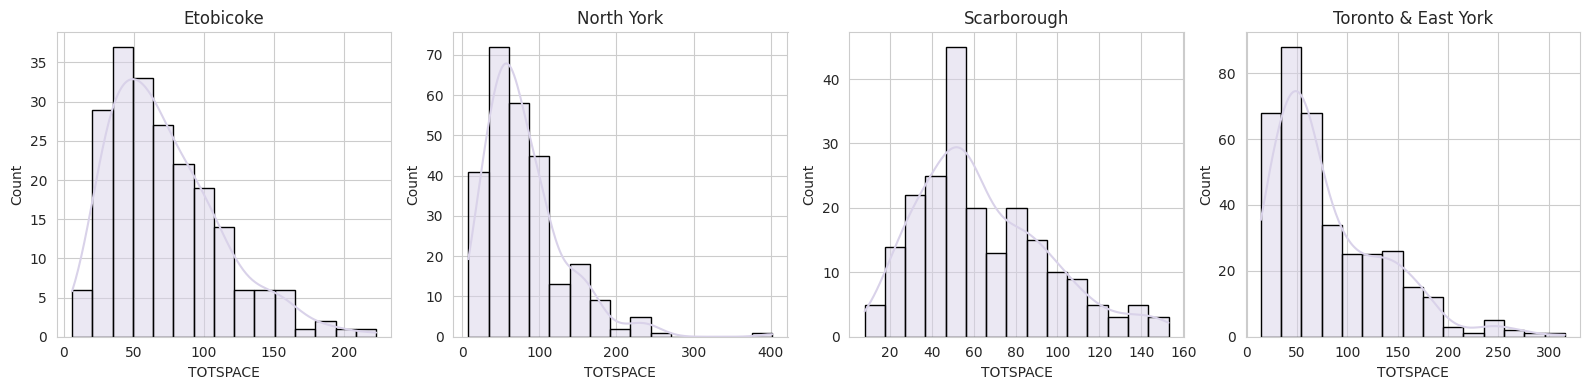

In [153]:
# Set the number of bins for histograms
bins_number = 15

# Plot histograms for the raw data on one canvas
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot histogram with KDE for Etobicoke data
sns.histplot(etobicoke_data_raw, bins=bins_number, edgecolor='black', color='#d9d2e9', kde=True, ax=axes[0])
axes[0].set_title('Etobicoke')

# Plot histogram with KDE for North York data
sns.histplot(north_york_data_raw, bins=bins_number, edgecolor='black', color='#d9d2e9', kde=True, ax=axes[1])
axes[1].set_title('North York')

# Plot histogram with KDE for Scarborough data
sns.histplot(scarborough_data_raw, bins=bins_number, edgecolor='black', color='#d9d2e9', kde=True, ax=axes[2])
axes[2].set_title('Scarborough')

# Plot histogram with KDE for Toronto & East York data
sns.histplot(toronto_east_york_data_raw, bins=bins_number, edgecolor='black', color='#d9d2e9', kde=True, ax=axes[3])
axes[3].set_title('Toronto & East York')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

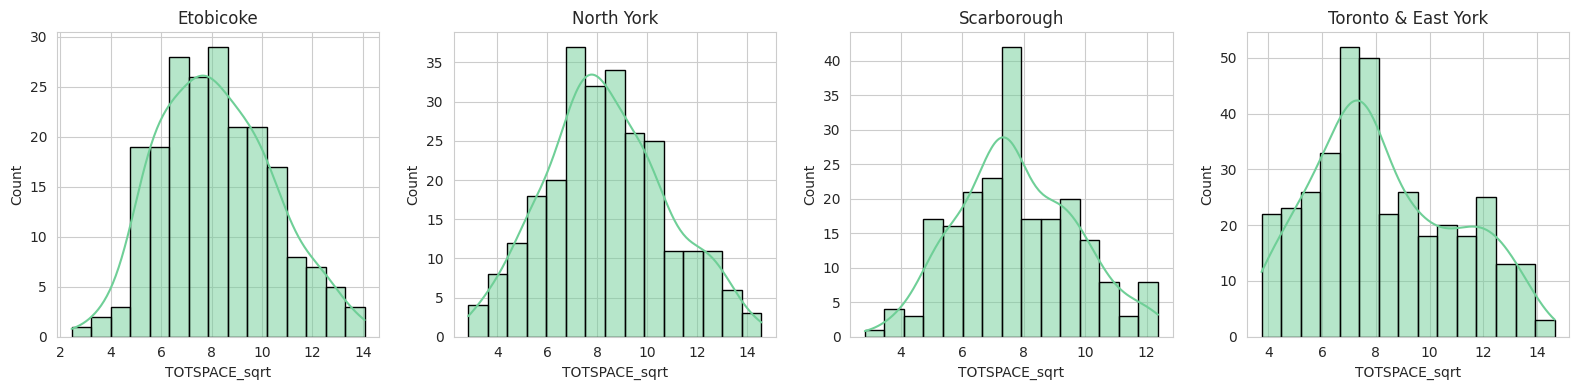

In [154]:
# Plot histograms for the data above on one canvas
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot histogram with KDE for Etobicoke data
sns.histplot(etobicoke_data, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[0])
axes[0].set_title('Etobicoke')

# Plot histogram with KDE for North York data
sns.histplot(north_york_data, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[1])
axes[1].set_title('North York')

# Plot histogram with KDE for Scarborough data
sns.histplot(scarborough_data, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[2])
axes[2].set_title('Scarborough')

# Plot histogram with KDE for Toronto & East York data
sns.histplot(toronto_east_york_data, bins=bins_number, edgecolor='black', color='#6FCF97', kde=True, ax=axes[3])
axes[3].set_title('Toronto & East York')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Research Question #1


**Research Question 1: How do the quantities of available child care spaces differ across Ontario's Community Councils, and do these differences hold statistical significance?**



In [155]:
# This function checks if the data is normally distributed
def is_normal_distribution(data, alpha=0.05):
    # Check if there are at least 20 data points
    if len(data) < 20:
        return False

    # Perform the Shapiro-Wilk test for normality
    try:
        stat, p_value = stats.shapiro(data)
        # Return True if the p-value is greater than the significance level
        return p_value > alpha
    except Exception as e:
        print(f"Error occurred while conducting Shapiro-Wilk test: {e}")
        return False

# Test each column for normality
for column in df_community_council_pivot.columns:
    data = df_community_council_pivot[column]
    is_normal = is_normal_distribution(data)
    print(f"Column '{column}' is normally distributed: {is_normal}")

Column 'ETOBICOKE' is normally distributed: True
Column 'NORTH_YORK' is normally distributed: True
Column 'SCARBOROUGH' is normally distributed: True
Column 'TORONTO_EAST_YORK' is normally distributed: True


In [156]:
# Calculate a display TOTSPACE mean by Community Council
df_community_council[['COMMUNITY_COUNCIL', 'TOTSPACE_sqrt']].sort_values('COMMUNITY_COUNCIL').groupby('COMMUNITY_COUNCIL').mean()

,TOTSPACE_sqrt
COMMUNITY_COUNCIL,
ETOBICOKE,8.167074
NORTH_YORK,8.359364
SCARBOROUGH,7.781946
TORONTO_EAST_YORK,8.289055


In [157]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# Ordinary Least Squares (OLS) model and ANOVA table
model = ols('TOTSPACE_sqrt ~ C(COMMUNITY_COUNCIL)', data=df_community_council).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using stat object
res = stat()
res.anova_stat(df=df_community_council, res_var='TOTSPACE_sqrt', anova_model='TOTSPACE_sqrt ~ C(COMMUNITY_COUNCIL)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(COMMUNITY_COUNCIL),3.0,46.568350,15.522783,2.756008,0.041316
Residual,1041.0,5863.270415,5.632344,NaN,NaN


In [158]:
# Generate post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df_community_council, res_var='TOTSPACE_sqrt', xfac_var='COMMUNITY_COUNCIL', anova_model='TOTSPACE_sqrt ~ C(COMMUNITY_COUNCIL)')

# Show summary
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,ETOBICOKE,NORTH_YORK,0.192289,-0.376033,0.760612,1.231261,0.796558
1,ETOBICOKE,SCARBOROUGH,0.385128,-0.208766,0.979023,2.359858,0.341170
2,ETOBICOKE,TORONTO_EAST_YORK,0.121981,-0.408016,0.651977,0.837545,0.900000
3,NORTH_YORK,SCARBOROUGH,0.577418,0.012775,1.142060,3.721400,0.042811
4,NORTH_YORK,TORONTO_EAST_YORK,0.070309,-0.426689,0.567306,0.514807,0.900000
5,SCARBOROUGH,TORONTO_EAST_YORK,0.507109,-0.018939,1.033158,3.508048,0.063629


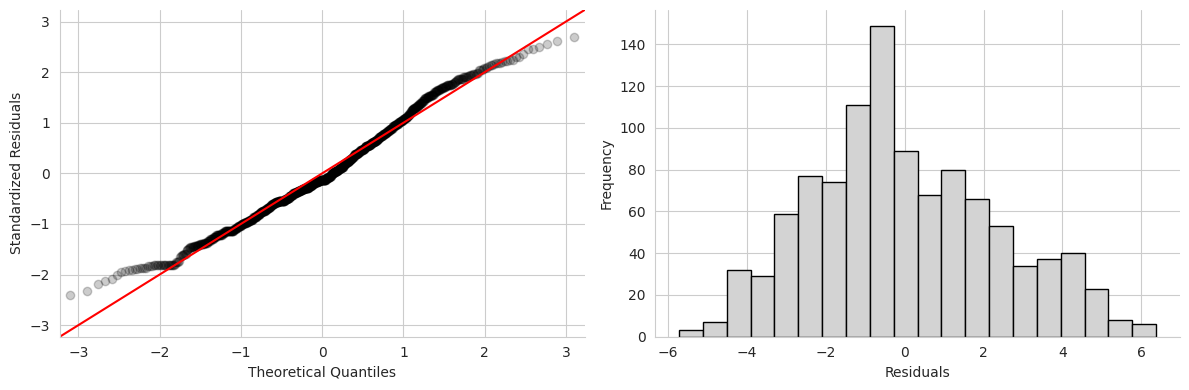

In [159]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Remove top and right border, and x-axis tick marks
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('none')

# Plot QQ plot
sm.qqplot(res.anova_std_residuals, line='45', markerfacecolor='black', markeredgecolor='black', alpha=0.2, ax=axes[0])
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Standardized Residuals")

# Plot histogram with light grey color
axes[1].hist(res.anova_model_out.resid, bins=20, histtype='bar', ec='k', color='lightgrey')
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [160]:
# Assumption: Residuals are normally distributed - Shapiro-Wilk test
w, pvalue = stats.shapiro(model.resid)
print("Shapiro-Wilk test statistic:", w)
print("p-value:", pvalue)

Shapiro-Wilk test statistic: 0.9857341647148132
p-value: 1.430525831125351e-08


In [161]:
# Assumption: Variances are homogeneous - Bartlett's test
w, pvalue = stats.bartlett(etobicoke_data, north_york_data, scarborough_data, toronto_east_york_data)
print("Bartlett's test statistic:", w)
print("p-value:", pvalue)

# Using stat object for Bartlett's test
res = stat()
res.bartlett(df=df_community_council, res_var='TOTSPACE_sqrt', xfac_var='COMMUNITY_COUNCIL')
res.bartlett_summary

Bartlett's test statistic: 28.906267025900934
p-value: 2.3433238815986704e-06


,Parameter,Value
0,Test statistics (T),28.9063
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [162]:
# Assumption: Variances are homogeneous - Levene's test (when the sample is not normally distributed)
res.levene(df=df_community_council, res_var='TOTSPACE_sqrt', xfac_var='COMMUNITY_COUNCIL')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.3492
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


In [163]:
# Install pingouin package
!pip install pingouin
import pingouin as pg

In [164]:
# Perform Welch's ANOVA
welch_anova_result = pg.welch_anova(data=df_community_council, dv='TOTSPACE_sqrt', between='COMMUNITY_COUNCIL')

# Convert the result to a pandas DataFrame
welch_anova_df = pd.DataFrame(welch_anova_result)

# Print the DataFrame
print(welch_anova_df)

              Source  ddof1       ddof2         F     p-unc      np2
0  COMMUNITY_COUNCIL      3  548.396322  3.596327  0.013501  0.00788


In [165]:
# Conduct Games-Howell pairwise post-hoc tests
pairwise_posthoc = pg.pairwise_gameshowell(data=df_community_council, dv='TOTSPACE_sqrt', between='COMMUNITY_COUNCIL')

# Print the pairwise post-hoc test results
print(pairwise_posthoc)

             A                  B   mean(A)   mean(B)      diff        se  \
0    ETOBICOKE         NORTH_YORK  8.167074  8.359364 -0.192289  0.215129   
1    ETOBICOKE        SCARBOROUGH  8.167074  7.781946  0.385128  0.202403   
2    ETOBICOKE  TORONTO_EAST_YORK  8.167074  8.289055 -0.121981  0.208109   
3   NORTH_YORK        SCARBOROUGH  8.359364  7.781946  0.577418  0.198558   
4   NORTH_YORK  TORONTO_EAST_YORK  8.359364  8.289055  0.070309  0.204371   
5  SCARBOROUGH  TORONTO_EAST_YORK  7.781946  8.289055 -0.507109  0.190930   

          T          df      pval    hedges  
0 -0.893831  456.127830  0.808067 -0.082423  
1  1.902776  407.897440  0.228450  0.185057  
2 -0.586138  495.511825  0.936251 -0.048499  
3  2.908054  469.198175  0.019853  0.262861  
4  0.344024  584.696551  0.985993  0.027488  
5 -2.655999  553.165902  0.040469 -0.210298  


# Research Question #2


**Research Question #2 : Are there significant interactions between the types of age-based Child Care clusters (such as infant, toddler, preschooler, etc.) and Ontario's Community Councils in determining the provision of child care services?"**


In [166]:
# Preprocesses the data by taking the square root of the specified column, replacing 0 values with NaN, and removing outliers.
def process_data(df, column_name, columns_to_remove_outliers):
    # Extract specified column and 'COMMUNITY_COUNCIL' columns from the DataFrame df
    data = df[[column_name, 'COMMUNITY_COUNCIL']]

    # Take the square root of the specified column
    data[column_name] = np.sqrt(data[column_name])

    # Replace 0 values in the specified column with NaN
    data[column_name] = data[column_name].replace(0, np.nan)

    # Remove outliers from the specified column
    data = remove_outliers(data, [column_name])

    return data

In [167]:
# Process data for different age groups
infant_data = process_data(df, 'IGSPACE_PF', ['IGSPACE_PF'])
toddler_data = process_data(df, 'TGSPACE_PF', ['TGSPACE_PF'])
kindergarten_data = process_data(df, 'KGSPACE_PF', ['KGSPACE_PF'])
preschool_data = process_data(df, 'PGSPACE_PF', ['PGSPACE_PF'])
secondary_data = process_data(df, 'SGSPACE_PF', ['SGSPACE_PF'])

<ipython-input-166-0a3560e56053>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = np.sqrt(data[column_name])
<ipython-input-166-0a3560e56053>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].replace(0, np.nan)
<ipython-input-131-f26b35619907>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

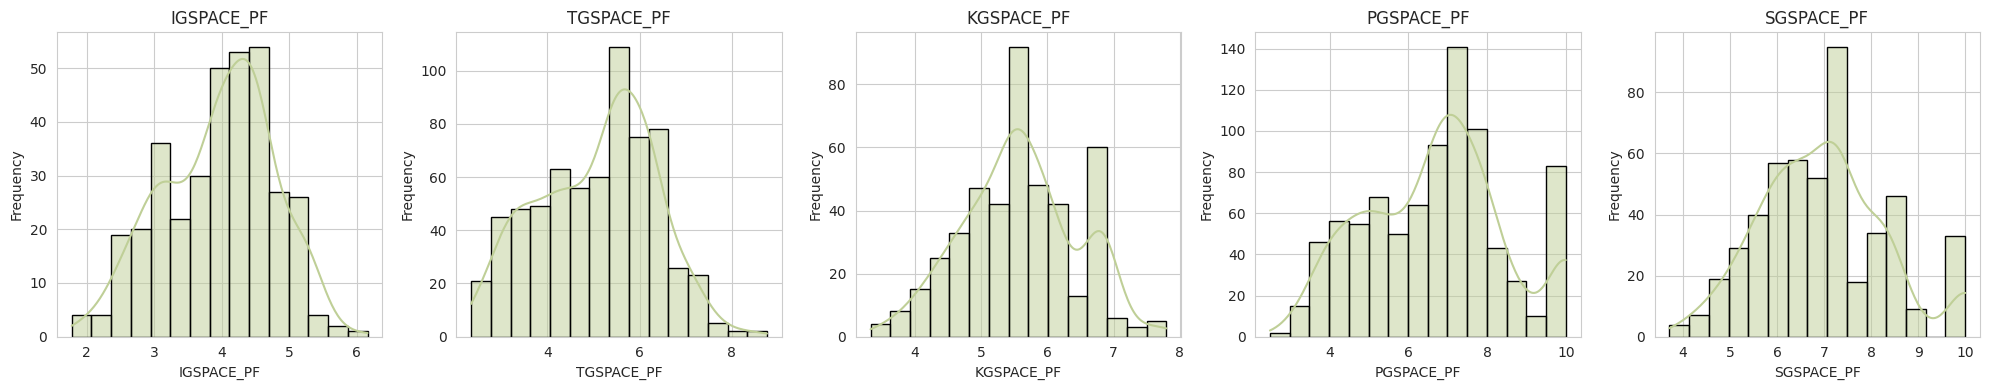

In [168]:
#  Plots a histogram with KDE for the specified column in the df

def plot_histogram_kde(df, column_name, bins_number=15, ax=None):
    # Extract specified column from the DataFrame df
    data = df[column_name]

    # Plot histogram with KDE
    sns.histplot(data, bins=bins_number, edgecolor='black', color='#BFCF97', kde=True, ax=ax)
    ax.set_title(column_name)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')

# Plot histograms with KDE for each dataset in one row
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

plot_histogram_kde(infant_data, 'IGSPACE_PF', ax=axes[0])
plot_histogram_kde(toddler_data, 'TGSPACE_PF', ax=axes[1])
plot_histogram_kde(kindergarten_data, 'KGSPACE_PF', ax=axes[2])
plot_histogram_kde(preschool_data, 'PGSPACE_PF', ax=axes[3])
plot_histogram_kde(secondary_data, 'SGSPACE_PF', ax=axes[4])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [169]:
# Concatenate all DataFrames into one
combined_data = pd.concat([infant_data, toddler_data['TGSPACE_PF'], kindergarten_data['KGSPACE_PF'], preschool_data['PGSPACE_PF'], secondary_data['SGSPACE_PF']], axis=1)

# Display the combined DataFrame
combined_data.set_index('COMMUNITY_COUNCIL').sort_values(by='COMMUNITY_COUNCIL')

,IGSPACE_PF,TGSPACE_PF,KGSPACE_PF,PGSPACE_PF,SGSPACE_PF
COMMUNITY_COUNCIL,,,,,
ETOBICOKE,NaN,3.492148,5.630924,4.417262,6.048587
ETOBICOKE,NaN,5.000000,NaN,8.660254,NaN
ETOBICOKE,NaN,NaN,5.498418,NaN,8.352688
ETOBICOKE,NaN,5.649327,NaN,8.251370,NaN
ETOBICOKE,NaN,NaN,5.204162,NaN,8.539128
...,...,...,...,...,...
TORONTO_EAST_YORK,3.261641,3.994671,4.495865,4.946524,5.359422
TORONTO_EAST_YORK,NaN,NaN,NaN,10.000000,NaN
TORONTO_EAST_YORK,NaN,NaN,NaN,10.000000,NaN


In [170]:
# Reset the index of combined_data if it's not already reset
combined_data.reset_index(drop=True, inplace=True)

# Melt the df to transform it to the desired format
melted_data = pd.melt(combined_data, id_vars='COMMUNITY_COUNCIL', var_name='CHILD_CARE_CLUSTER', value_name='AVAILABLE_SPACE_PF')

# Display the melted DataFrame
melted_data

,COMMUNITY_COUNCIL,CHILD_CARE_CLUSTER,AVAILABLE_SPACE_PF
0,ETOBICOKE,IGSPACE_PF,NaN
1,NORTH_YORK,IGSPACE_PF,NaN
2,SCARBOROUGH,IGSPACE_PF,NaN
3,TORONTO_EAST_YORK,IGSPACE_PF,3.922321
4,SCARBOROUGH,IGSPACE_PF,NaN
...,...,...,...
5310,NORTH_YORK,SGSPACE_PF,7.319249
5311,NORTH_YORK,SGSPACE_PF,NaN
5312,TORONTO_EAST_YORK,SGSPACE_PF,NaN
5313,NORTH_YORK,SGSPACE_PF,7.319249


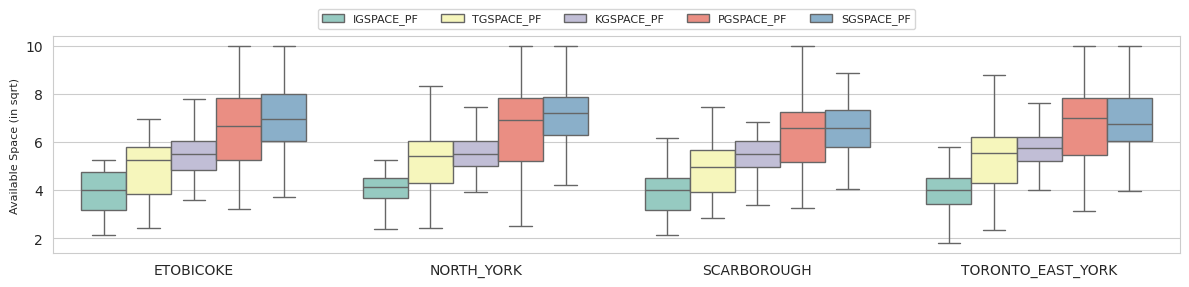

In [171]:
# Set the figure size and style
plt.figure(figsize=(12, 3))
sns.set_style("whitegrid")

# Create the boxplot
sns.boxplot(x="COMMUNITY_COUNCIL", y="AVAILABLE_SPACE_PF", hue="CHILD_CARE_CLUSTER", data=melted_data, palette="Set3", showfliers=False)

# Add title and labels
plt.xlabel('', fontsize=0)
plt.ylabel('Available Space (in sqrt)', fontsize=8)

# Adjust legend
plt.legend(title='', title_fontsize='13', loc='upper center', fontsize=8, bbox_to_anchor=(0.5, 1.15), ncol=5)

# Show plot
plt.tight_layout()
plt.show()

In [172]:
# Calculate mean values for each dataset
infant_data_mean = infant_data['IGSPACE_PF'].mean()
toddler_data_mean = toddler_data['TGSPACE_PF'].mean()
kindergarten_data_mean = kindergarten_data['KGSPACE_PF'].mean()
preschool_data_mean = preschool_data['PGSPACE_PF'].mean()
secondary_data_mean = secondary_data['SGSPACE_PF'].mean()

# Print mean value for infant_data
print("Mean value for infant_data:", infant_data_mean)

Mean value for infant_data: 3.959746887167155


In [173]:
#  This function replaces NaN values with the mean of the column
def replace_nan_with_mean(df, means):
    # Iterate over each CHILD_CARE_CLUSTER
    for child_care_type, mean_value in means.items():
        # Replace NaN values in the 'AVAILABLE_SPACE_PF' column corresponding to the current CHILD_CARE_CLUSTER with the mean value
        df.loc[df['CHILD_CARE_CLUSTER'] == child_care_type, 'AVAILABLE_SPACE_PF'] = df.loc[df['CHILD_CARE_CLUSTER'] == child_care_type, 'AVAILABLE_SPACE_PF'].fillna(mean_value)

# Dictionary of means for each CHILD_CARE_CLUSTER
means = {
    'IGSPACE_PF': infant_data_mean,
    'TGSPACE_PF': toddler_data_mean,
    'KGSPACE_PF': kindergarten_data_mean,
    'PGSPACE_PF': preschool_data_mean,
    'SGSPACE_PF': secondary_data_mean
}

# Replace NaN values in melted_data with means
replace_nan_with_mean(melted_data, means)

# Display the updated melted DataFrame
melted_data


,COMMUNITY_COUNCIL,CHILD_CARE_CLUSTER,AVAILABLE_SPACE_PF
0,ETOBICOKE,IGSPACE_PF,3.959747
1,NORTH_YORK,IGSPACE_PF,3.959747
2,SCARBOROUGH,IGSPACE_PF,3.959747
3,TORONTO_EAST_YORK,IGSPACE_PF,3.922321
4,SCARBOROUGH,IGSPACE_PF,3.959747
...,...,...,...
5310,NORTH_YORK,SGSPACE_PF,7.319249
5311,NORTH_YORK,SGSPACE_PF,6.957834
5312,TORONTO_EAST_YORK,SGSPACE_PF,6.957834
5313,NORTH_YORK,SGSPACE_PF,7.319249


In [174]:
# Define model
model = ols('AVAILABLE_SPACE_PF ~ C(COMMUNITY_COUNCIL) + C(CHILD_CARE_CLUSTER) + C(COMMUNITY_COUNCIL):C(CHILD_CARE_CLUSTER)', data=melted_data).fit()

# Run model
anova_table = sm.stats.anova_lm(model, typ=2)

# Show Results
anova_table

,sum_sq,df,F,PR(>F)
C(COMMUNITY_COUNCIL),13.003468,3.0,4.436493,0.004042
C(CHILD_CARE_CLUSTER),6354.025037,4.0,1625.888634,0.000000
C(COMMUNITY_COUNCIL):C(CHILD_CARE_CLUSTER),13.047418,12.0,1.112872,0.344106
Residual,5173.257546,5295.0,NaN,NaN


In [175]:
# Create a stat object
res = stat()

# Perform ANOVA
res.anova_stat(df=melted_data, res_var='AVAILABLE_SPACE_PF', anova_model='AVAILABLE_SPACE_PF ~ C(COMMUNITY_COUNCIL) + C(CHILD_CARE_CLUSTER) + C(COMMUNITY_COUNCIL):C(CHILD_CARE_CLUSTER)')

# Display ANOVA summary
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(COMMUNITY_COUNCIL),3.0,13.003468,4.334489,4.436493,0.004042
C(CHILD_CARE_CLUSTER),4.0,6354.025037,1588.506259,1625.888634,0.000000
C(COMMUNITY_COUNCIL):C(CHILD_CARE_CLUSTER),12.0,13.047418,1.087285,1.112872,0.344106
Residual,5295.0,5173.257546,0.977008,NaN,NaN


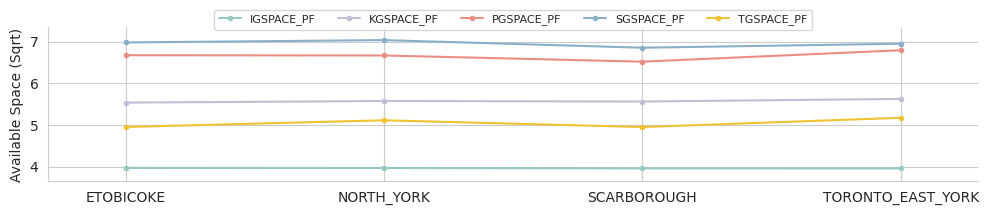

In [176]:
from statsmodels.graphics.factorplots import interaction_plot

# Create the interaction plot
fig, ax = plt.subplots(figsize=(12, 2))
interaction_plot(x=melted_data['COMMUNITY_COUNCIL'],
                 trace=melted_data['CHILD_CARE_CLUSTER'],
                 response=melted_data['AVAILABLE_SPACE_PF'],
                 colors=['#96cac1', '#c1bed6', '#ea8e83', '#8aafc9', '#f1c232'],
                 ax=ax)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set labels and title
ax.set_xlabel('')
ax.set_ylabel('Available Space (Sqrt)')

# Move the legend to the top
plt.legend(title='', title_fontsize='13', loc='upper center', fontsize=8, bbox_to_anchor=(0.5, 1.15), ncol=5)

# Show the plot
plt.show()

In [177]:
# Perform Tukey's HSD test
res.tukey_hsd(df=melted_data, res_var='AVAILABLE_SPACE_PF', xfac_var='COMMUNITY_COUNCIL', anova_model='AVAILABLE_SPACE_PF ~ C(COMMUNITY_COUNCIL) + C(CHILD_CARE_CLUSTER) + C(COMMUNITY_COUNCIL):C(CHILD_CARE_CLUSTER)')

# Display Tukey's HSD summary
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,ETOBICOKE,NORTH_YORK,0.049336,-0.055615,0.154286,1.708436,0.607106
1,ETOBICOKE,SCARBOROUGH,0.053465,-0.056876,0.163806,1.760969,0.586258
2,ETOBICOKE,TORONTO_EAST_YORK,0.076935,-0.021021,0.174891,2.854400,0.181227
3,NORTH_YORK,SCARBOROUGH,0.102800,-0.001601,0.207202,3.578559,0.055487
4,NORTH_YORK,TORONTO_EAST_YORK,0.027599,-0.063615,0.118813,1.099660,0.848709
5,SCARBOROUGH,TORONTO_EAST_YORK,0.130400,0.033032,0.227768,4.867232,0.003266


In [178]:
# Perform Tukey's HSD test
res.tukey_hsd(df=melted_data, res_var='AVAILABLE_SPACE_PF', xfac_var='CHILD_CARE_CLUSTER', anova_model='AVAILABLE_SPACE_PF ~ C(COMMUNITY_COUNCIL) + C(CHILD_CARE_CLUSTER) + C(COMMUNITY_COUNCIL):C(CHILD_CARE_CLUSTER)')

# Display Tukey's HSD summary
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE_PF,TGSPACE_PF,1.107746,0.990755,1.224737,36.539097,0.001
1,IGSPACE_PF,KGSPACE_PF,1.621519,1.504528,1.738510,53.485930,0.001
2,IGSPACE_PF,PGSPACE_PF,2.722736,2.605745,2.839727,89.809678,0.001
3,IGSPACE_PF,SGSPACE_PF,2.998087,2.881096,3.115078,98.892156,0.001
4,TGSPACE_PF,KGSPACE_PF,0.513773,0.396782,0.630764,16.946833,0.001
5,TGSPACE_PF,PGSPACE_PF,1.614990,1.497999,1.731981,53.270581,0.001
6,TGSPACE_PF,SGSPACE_PF,1.890341,1.773350,2.007332,62.353060,0.001
7,KGSPACE_PF,PGSPACE_PF,1.101217,0.984226,1.218209,36.323748,0.001
8,KGSPACE_PF,SGSPACE_PF,1.376569,1.259578,1.493560,45.406227,0.001
9,PGSPACE_PF,SGSPACE_PF,0.275351,0.158360,0.392342,9.082478,0.001
